<a href="https://colab.research.google.com/github/nsajwan/line_item_extraction/blob/master/Line_Item_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank statements Line Item Extraction
Based on Cascade TableNet - https://github.com/DevashishPrasad/CascadeTabNet 

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [3]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3
%cd "/content"
!apt-get install poppler-utils
!pip install pdf2image
!pip install pdfminer
!pip install Pillow

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 25kB/s 
     |████████████████████████████████| 4.1MB 26.0MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 245kB 2.6MB/s 
     |████████████████████████████████| 194kB 4.5MB/s 
Cloning into 'mmdetection'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 12865 (delta 4), reused 2 (delta 0), pack-reused 12829
Receiving objects: 100% (12865/12865), 13.63 MiB | 8.13 MiB/s, done.
Resolving deltas: 100% (8644/8644), done.
Note: checking out '0f33c08d8d46eba8165715a0995841a975badfd4'.

You are in 'det

Streaming output truncated to the last 5000 lines.
   ^~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:25:3: note: in expansion of macro ‘CHECK_CONTIGUOUS’
   CHECK_CONTIGUOUS(x)
   ^~~~~~~~~~~~~~~~
mmdet/ops/masked_conv/src/masked_conv2d_cuda.cpp:34:3: note: in expansion of macro ‘CHECK_INPUT’
   CHECK_INPUT(col);
   ^
In file included from /usr/local/lib/python3.6/dist-packages/torch/include/c10/core/Device.h:5:0,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/c10/core/Allocator.h:6,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/ATen/ATen.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/types.h:3,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader_options.h:4,
                 from /usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include/torch/data/dataloader/base.h:3,
    

     |████████████████████████████████| 2.1MB 2.7MB/s 
  Found existing installation: Pillow 6.2.2
    Uninstalling Pillow-6.2.2:
      Successfully uninstalled Pillow-6.2.2


     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for mmcv: filename=mmcv-0.4.3-cp36-cp36m-linux_x86_64.whl size=170849 sha256=896ba5fba97cc3bfdb8dff001bccc14136ea3b02c00de508e5b1a75ba14bd0ef
  Stored in directory: /root/.cache/pip/wheels/1e/c3/ee/7eddece4815cfe949be3d489912d22465e244260b587bb05e1
Successfully built mmcv
  Found existing installation: mmcv 1.1.1
    Uninstalling mmcv-1.1.1:
      Successfully uninstalled mmcv-1.1.1
/content
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils

## 2. Clone the Repository

In [1]:
!rm -rf line_item_extraction
!git clone https://github.com/strangest-quark/line_item_extraction.git

Cloning into 'line_item_extraction'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 84 (delta 34), reused 45 (delta 12), pack-reused 0
Unpacking objects: 100% (84/84), done.


## 3. Pdf to Images and XML


In [2]:
!rm -rf /content/line_item_extraction/results
import os
from pdf2image import convert_from_path, convert_from_bytes
from PIL import Image
import subprocess

pdf_directory = '/content/line_item_extraction/sample_docs'
res_directory = '/content/line_item_extraction/results'
cmd = 'pdftohtml -i -c -noframes -xml '

results = []

for filename in os.listdir(pdf_directory):
  try:
    if filename.endswith(".pdf"):
      os.makedirs(res_directory+'/'+filename[:-4])
      full_cmd = cmd+pdf_directory+'/'+filename+' '+res_directory+'/'+filename[:-4]+'/'+filename[:-4]+'.xml'
      !{full_cmd}
      images = convert_from_path(pdf_directory+'/'+filename)
      i = 0
      os.makedirs(res_directory+'/'+filename[:-4]+'/img')
      for image in images:
        image.save(res_directory+'/'+filename[:-4]+'/img/'+str(i)+'.png', format='PNG')
        i=i+1
  except:
    print("Error")

/bin/bash: T_2_Sample2.xml: command not found
/bin/bash: T_2_Sample2/Redacted_BB: No such file or directory
/bin/bash: T_2_Sample2.pdf: command not found
I/O Error: Couldn't open file '/content/line_item_extraction/sample_docs/Redacted_BB': No such file or directory.
Page-1
Page-2
Page-1
Syntax Error (443505): No current point in closepath
Syntax Error (443573): No current point in closepath
Syntax Error (443610): No current point in closepath
Syntax Error (443665): No current point in closepath
Syntax Error (444507): No current point in closepath
Syntax Error (444538): No current point in closepath
Syntax Error (444565): No current point in closepath
Syntax Error (444589): No current point in closepath
Syntax Error (444614): No current point in closepath
Syntax Error (444639): No current point in closepath
Syntax Error (444662): No current point in closepath
Syntax Error (444686): No current point in closepath
Syntax Error (444711): No current point in closepath
Syntax Error (444737):

## 3. Download the Pretrained Model


In [3]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
664MB [00:09, 73.2MB/s]


## 4. Run the Predictions

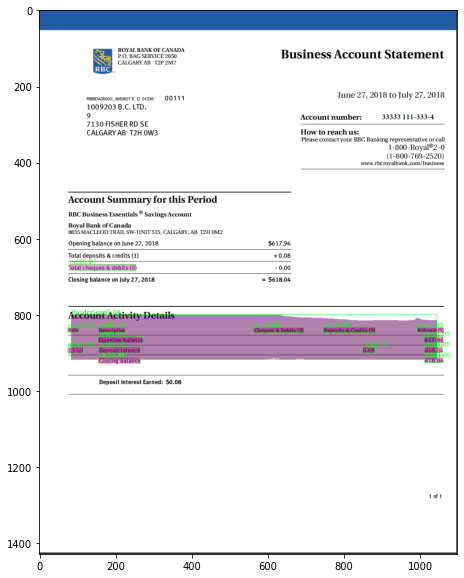

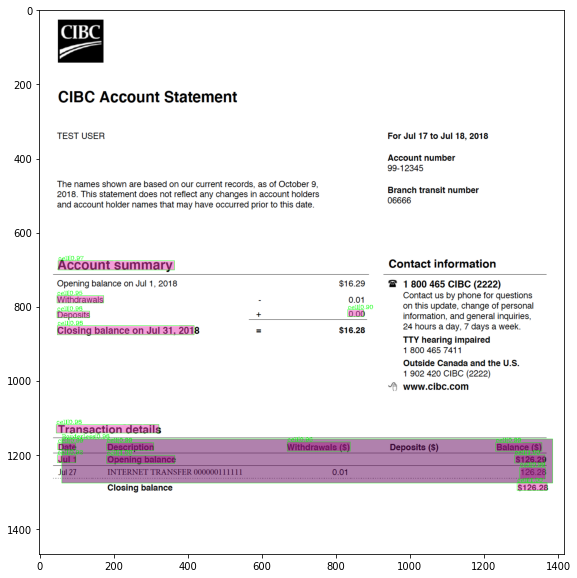

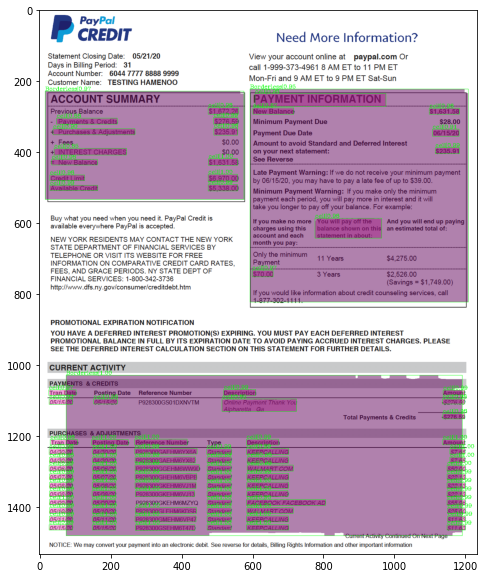

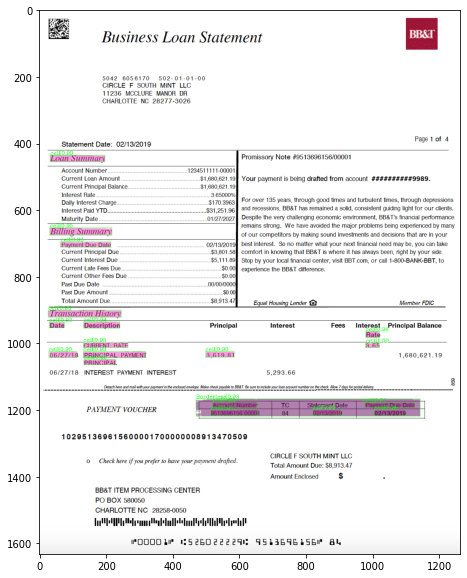

In [4]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

# Load model
config_file = '/content/line_item_extraction/config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

directory = '/content/line_item_extraction/sample_docs/imgs'

results = []

for filename in os.listdir(directory):
    if filename.endswith(".png"):
      # Run Inference
      results.append(inference_detector(model, directory+'/'+filename))

      # Visualization results
      show_result_pyplot(directory+'/'+filename, results[-1],('Bordered', 'cell', 'Borderless'), score_thr=0.85)

After this, use TSR postprocessing for best result

In [5]:
%cd "/content"
from line_item_extraction.border_main import border
import lxml.etree as etree
import cv2
from google.colab.patches import cv2_imshow
from mmdet.apis import inference_detector, show_result, init_detector
import glob
from line_item_extraction.cell_text import borderless

result = results[0]

image_path = '/content/line_item_extraction/results/RedactedPayPal_sample3/img/'

config_fname = "/content/line_item_extraction/config/cascade_mask_rcnn_hrnetv2p_w32_20e.py" 
checkpoint_path = "/content/"
epoch = 'epoch_36.pth'

model = init_detector(config_fname, checkpoint_path+epoch)

imgs=[]

# List of images in the image_path
for filename in os.listdir(image_path):
    if filename.endswith(".png"):
      imgs.append(image_path+filename)
print(imgs)
for i in imgs:
  for i in imgs:
    try:
      result = inference_detector(model, i)
      res_border = []
      res_bless = []
      res_cell = []
      root = etree.Element("document")
      ## for border
      for r in result[0][0]:
        if r[4] > .85:
            res_border.append(r[:4].astype(int))
      ## for cells
      for r in result[0][1]:
          if r[4] > .85:
              r[4] = r[4] * 100
              res_cell.append(r.astype(int))
      ## for borderless
      for r in result[0][2]:
          if r[4] > .85:
              res_bless.append(r[:4].astype(int))

      ## if border tables detected
      if len(res_border) != 0:
          ## call border script for each table in image
          for res in res_border:
              try:
                  root.append(border(res, cv2.imread(i)))
              except:
                  pass
      if len(res_bless) != 0:
          if len(res_cell) != 0:
              for no, res in enumerate(res_bless):
                  root.append(borderless(res, cv2.imread(i), res_cell))
      myfile = open(xmlPath + i.split('/')[-1][:-3] + 'xml', "w")
      myfile.write('<?xml version="1.0" encoding="UTF-8"?>\n')
      myfile.write(etree.tostring(root, pretty_print=True, encoding="unicode"))
      myfile.close()
    except:
      print("Error")
      

/content
['/content/line_item_extraction/results/RedactedPayPal_sample3/img/0.png', '/content/line_item_extraction/results/RedactedPayPal_sample3/img/2.png', '/content/line_item_extraction/results/RedactedPayPal_sample3/img/1.png']
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
Error
[Table status] : Processing table with lines
Error
[Table status] : Processing table with lines
Error
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
Error
[Table status] : Processing table with lines
Error
[Table status] : Processing table with lines
Error
[Table status] : Processing table with lines
[Table status] : Processing table with lines
[Table status] : Processing table with lines
Error
[Table status] : Processing table with lines
Error
[Table status] : Processing table with lines
Error


In [6]:
!pip install pdfrw
from pdfrw import PdfReader
pdf = PdfReader('/content/line_item_extraction/sample_docs/RedactedPayPal_sample3.pdf')
from PIL import Image
im = Image.open('/content/line_item_extraction/results/RedactedPayPal_sample3/img/0.png')

def TranslatePoints(src, pdf, im):

        sx0, sy0, sx1, sy1 = src
        print(len(pdf.pages))
        ssx, ssy = (int(pdf.pages[0].MediaBox[2]),int(pdf.pages[0].MediaBox[3]))
        print(ssx, ssy)
        dsx, dsy = im.size
        sy01 = ssy-sy1
        sy11 = ssy-sy0
        x0 = sx0/int(pdf.pages[0].MediaBox[2])*im.size[0]
        x1 = sx1/int(pdf.pages[0].MediaBox[2])*im.size[0]
        y0 = sy01/int(pdf.pages[0].MediaBox[3])*im.size[1]
        y1 = sy11/int(pdf.pages[0].MediaBox[3])*im.size[1]
        return (x0, y0, x1, y1)


TranslatePoints((46, 876, 105, 887), pdf, im)

     |████████████████████████████████| 71kB 1.9MB/s 
3
612 1008


(127.77777777777777, 336.11111111111114, 291.6666666666667, 366.6666666666667)